In [268]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)



p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c




In [269]:
data_pl_V_abs_1_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_1_5_B_30_theta_60_n_1.txt')
data_pl_V_abs_2_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_B_30_theta_60_n_1.txt')

data_pl_V_abs_2_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_60_n_1.txt')

data_pl_V_abs_2_5_B_10_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_10_theta_60_n_1.txt')
data_pl_V_abs_2_5_B_50_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_50_theta_60_n_1.txt')

data_pl_V_abs_2_5_B_30_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_60_n_2.txt')

data_pl_V_abs_2_5_B_30_theta_10_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_10_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_20_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_20_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_30_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_30_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_40_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_40_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_50_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_50_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_70_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_70_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_80_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_80_n_1.txt')
data_pl_V_abs_2_5_B_30_theta_85_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_2_5_B_30_theta_85_n_1.txt')


data_pl_V_abs_4_5_B_40_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_4_5_B_40_theta_40_n_2.txt')



data_pl_V_abs_3_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_3_B_30_theta_60_n_1.txt')
data_pl_V_abs_3_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_3_5_B_30_theta_60_n_1.txt')
data_pl_V_abs_4_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_4_B_30_theta_60_n_1.txt')
data_pl_V_abs_4_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_4_5_B_30_theta_60_n_1.txt')
data_pl_V_abs_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_5_B_30_theta_60_n_1.txt')

data_pl_V_abs_5_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_5_5_B_30_theta_60_n_1.txt')

data_pl_V_abs_5_5_B_10_theta_20_n_3 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_5_5_B_10_theta_20_n_3.txt')


data_pl_V_abs_6_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/pl_V_abs_6_B_30_theta_60_n_1.txt')




In [270]:
def jnu_58(nuratio):
    nu = nuratio * nu_c
    first_part       = n_e * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (nu/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
    ans              = first_part * second_part * third_part * fourth_part
    return ans

def anu_59(nuratio):
    nu = nuratio * nu_c
    first_term = n_e * (e**2 / (nu * m * c))
    second_term = 3.**((p_PL + 1.)/2.) * (p_PL - 1.) / (4. * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
    third_term = special.gamma((3. * p_PL + 2.) / 12.)
    fourth_term = special.gamma((3. * p_PL + 22.) / 12.)
    fifth_term = (nu / (nu_c * np.sin(theta)))**(- (p_PL + 2.)/2.)
    ans = first_term * second_term * third_term * fourth_term * fifth_term
    return ans



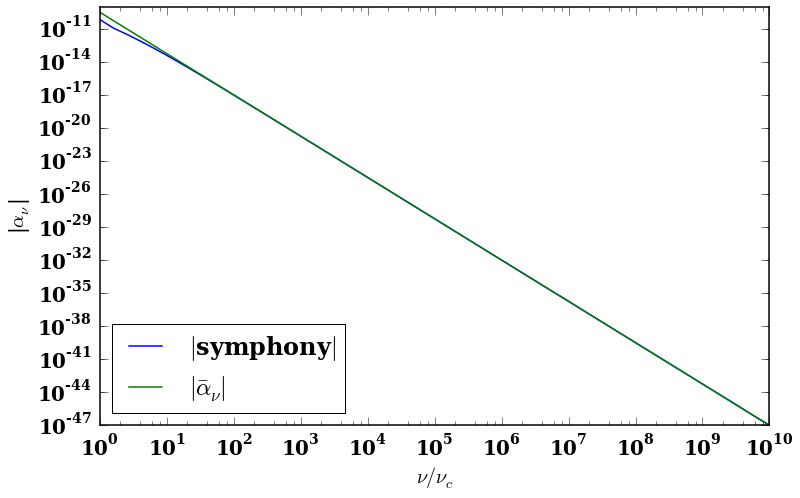

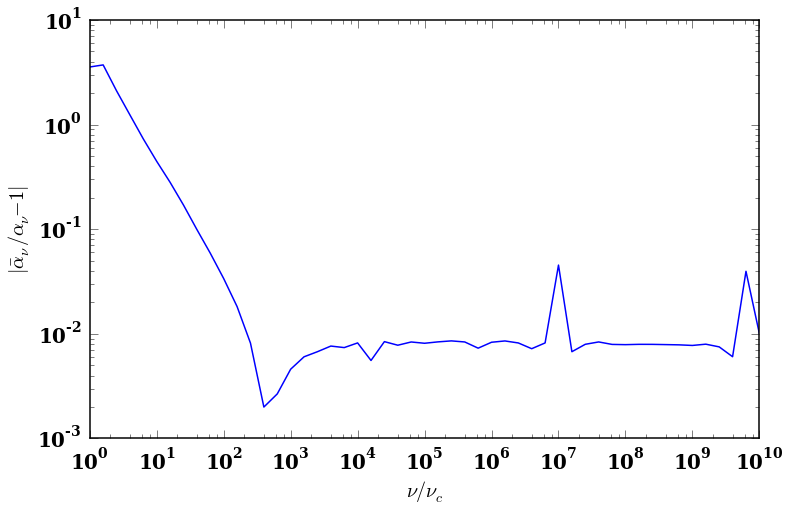

In [271]:
x_3 = data_pl_V_abs_2_5_B_30_theta_60_n_1[:,0]
y_3 = -data_pl_V_abs_2_5_B_30_theta_60_n_1[:,1]

#AA = (0.70981174 * p_PL + 0.03431502)**0.39389724

AA = (71./100. * p_PL + 22./625.)**(197./500.)

BB = -1./2.

#ThtetaDepen = (3.10220663 * np.sin(theta)**(-1.91239622) - 3.09794495)**0.51360287

ThtetaDepen = (31./10. * np.sin(theta)**(-48./25.) - 31./10.)**(64./125.)

def func_3(nuratio):
    nu = nuratio * nu_c
    X_pl = nu/(nu_c * np.sin(theta))
    f = ThtetaDepen*AA*anu_59(nuratio) *  X_pl**(BB)
    return f



pl.loglog(x_3, y_3, label = '$|$symphony$|$')
pl.loglog(x_3, func_3(x_3), label = '$|\\bar{\\alpha}_{\\nu}|$')
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("|$\\alpha_\\nu$|")
pl.legend(loc = 'lower left')
pl.show()

pl.loglog(x_3, abs(func_3(x_3)/y_3 - 1.))
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\bar{\\alpha}_\\nu / \\alpha_{\\nu} - 1|$")
pl.legend()
pl.show()



(array([ 0.70981174,  0.03431502,  0.39389724]), array([[ 0.00488331, -0.00776148, -0.00144195],
       [-0.00776148,  0.01252764,  0.00227116],
       [-0.00144195,  0.00227116,  0.0004301 ]]))


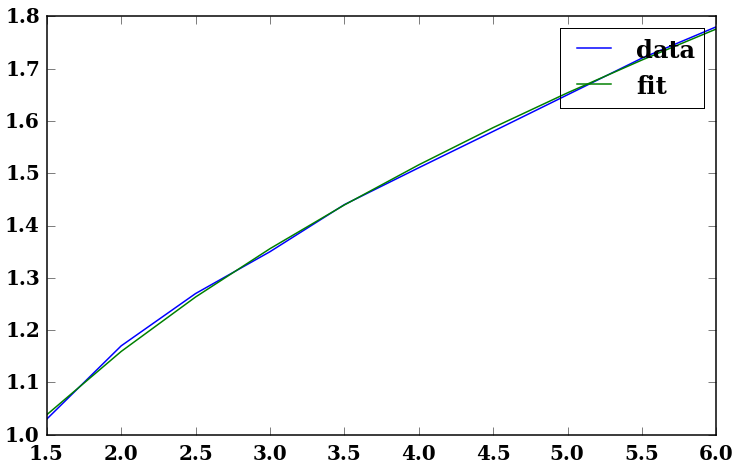

In [263]:
data_AA_V_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/AA_V_fit.txt')
x_4 = data_AA_V_fit[:,0]
y_4 = data_AA_V_fit[:,1]


def func_4(x, a, b, c):
    f = (a * x + b)**c
    return f

print curve_fit(func_4, x_4, y_4, p0 = [0.70981174,  0.03431502,  0.39389724])


pl.plot(x_4, y_4, label = 'data')
pl.plot(x_4, func_4(x_4,71./100.,  22./625.,  197./500.), label = 'fit')

pl.legend()




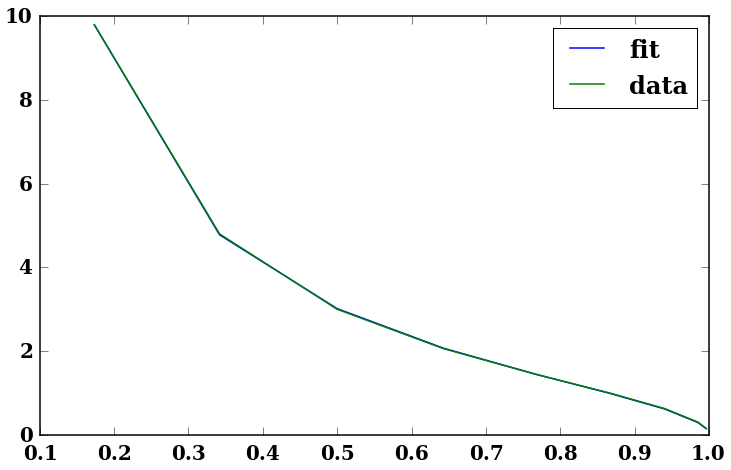

In [248]:
data_theta_depen_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_V_mode/theta_depen_fit.txt')
x_186 = np.sin(data_theta_depen_fit[:,0] * np.pi / 180.)
y_186 = data_theta_depen_fit[:,1]

def func_188(x, a, b,d,f):
    f = (a * x**b + d)**f
    return f

#print curve_fit(func_188, x_186, y_186, p0 = [3.10220664, -1.91239621, -3.09794495,  0.51360287])

pl.plot(x_186, func_188(x_186,31./10., -48./25., -31./10.,  64./125.), label = 'fit')

pl.plot(x_186, y_186, label = 'data')

pl.legend()
pl.show()



#x_187 = data_theta_depen_fit[:,0] * np.pi/180.
#y_187 = data_theta_depen_fit[:,1]




#def func_189(x, a):
#    f = a * (np.sin(x))**(1./2.)/np.tan(x)
#    return f

#print curve_fit(func_189, x_187, y_187)


#pl.plot(np.sin(x_187), y_187, label = 'data')
#pl.plot(np.sin(x_187), func_189(x_187, 3.3193096), label = 'fit')

#pl.legend()

#print func_188(np.sin(np.pi * 17./36.),3.10220663, -1.91239622, -3.09794495,  0.51360287)

